# Requirements

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from xgboost import XGBClassifier
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **count of page loads**. Your task involves employing bagging and boosting methods to forecast the **count of page loads**. To accomplish this, you will use data from the preceding three days, consisting of **count of page loads**, **count of unique visits**, **count of first time-visits**, **count of returning visits**, and the current **day**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [ ]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe # Download the dataset.

## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data = pd.read_csv('data/website_visitors.csv')
data.sample(5)

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
1577,1/8/2019,Tuesday,4.731,3.182,2.585,597.0
520,2/16/2016,Tuesday,5.495,4.000,3.304,696.0
215,4/17/2015,Friday,4.682,3.307,2.741,566.0
1017,6/27/2017,Tuesday,3.077,2.190,1.690,500.0
1456,9/9/2018,Sunday,3.346,2.255,1.906,349.0


Explore the dataset using visualizations of your choice.

In [5]:
data.isnull().sum()

date                 0
day_of_week          0
page_loads           0
unique_visits        0
first_time_visits    0
returning_visits     0
dtype: int64

Encode the categorical features.

In [7]:
data.head()

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,2014-09-14,Sunday,2.146,1.582,1.430,152.0
1,2014-09-15,Monday,3.621,2.528,2.297,231.0
2,2014-09-16,Tuesday,3.698,2.630,2.352,278.0
3,2014-09-17,Wednesday,3.667,2.614,2.327,287.0
4,2014-09-18,Thursday,3.316,2.366,2.130,236.0


<Axes: >

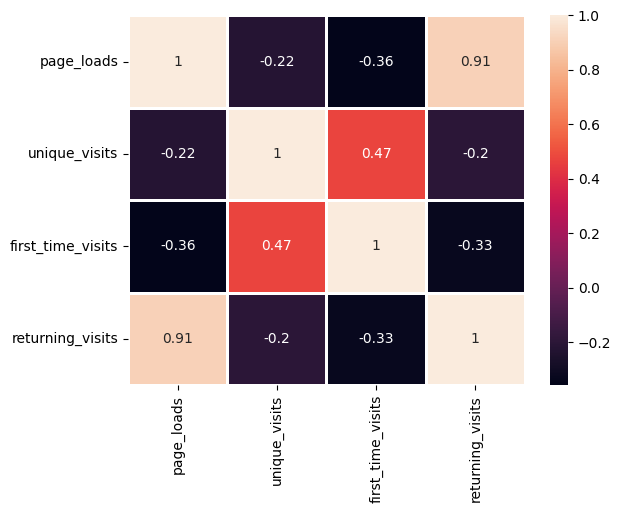

In [10]:
features = ['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']
sns.heatmap(data[features].corr(), annot=True, linewidths=2)

# Feauture Extraction
Apply a lag of one, two, and three days to each chosen feature (except `day_of_week`), creating a set of features representing the statistics from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [8]:
data.set_index('date', inplace = True)
data

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,Sunday,2.146,1.582,1.430,152.0
2014-09-15,Monday,3.621,2.528,2.297,231.0
2014-09-16,Tuesday,3.698,2.630,2.352,278.0
2014-09-17,Wednesday,3.667,2.614,2.327,287.0
2014-09-18,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,Saturday,2.221,1.696,1.373,323.0
2020-08-16,Sunday,2.724,2.037,1.686,351.0
2020-08-17,Monday,3.456,2.638,2.181,457.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [14]:
# encode the categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['day_of_week'] = encoder.fit_transform(data['day_of_week'])
data

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,3,2.146,1.582,1.430,152.0
2014-09-15,1,3.621,2.528,2.297,231.0
2014-09-16,5,3.698,2.630,2.352,278.0
2014-09-17,6,3.667,2.614,2.327,287.0
2014-09-18,4,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373,323.0
2020-08-16,3,2.724,2.037,1.686,351.0
2020-08-17,1,3.456,2.638,2.181,457.0


In [15]:
lags = range(3, 0, -1)
list(lags)

[3, 2, 1]

In [17]:
for lag in lags:
    for column in features:
        data[f'{column}_{lag}'] = data[column].shift(lag)

In [21]:
df = data.copy()
df.dropna(inplace=True)
df

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,page_loads_3,unique_visits_3,first_time_visits_3,returning_visits_3,page_loads_2,unique_visits_2,first_time_visits_2,returning_visits_2,page_loads_1,unique_visits_1,first_time_visits_1,returning_visits_1
date,,,,,,,,,,,,,,,,,
2014-09-17,6,3.667,2.614,2.327,287.0,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
2014-09-18,4,3.316,2.366,2.130,236.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
2014-09-19,0,2.815,1.863,1.622,241.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0
2014-09-20,2,1.658,1.118,985.000,133.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0
2014-09-21,3,2.288,1.656,1.481,175.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0,1.658,1.118,985.000,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373,323.0,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2020-08-16,3,2.724,2.037,1.686,351.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2020-08-17,1,3.456,2.638,2.181,457.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = features,axis=1)
y = df['page_loads']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

In [23]:
features

['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']

In [24]:
X

,day_of_week,page_loads_3,unique_visits_3,first_time_visits_3,returning_visits_3,page_loads_2,unique_visits_2,first_time_visits_2,returning_visits_2,page_loads_1,unique_visits_1,first_time_visits_1,returning_visits_1
date,,,,,,,,,,,,,
2014-09-17,6,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
2014-09-18,4,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
2014-09-19,0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0
2014-09-20,2,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0
2014-09-21,3,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0,1.658,1.118,985.000,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2020-08-16,3,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2020-08-17,1,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0


In [28]:
y.unique()

array([3.667, 3.316, 2.815, ..., 2.623, 3.581, 2.064])

In [29]:
# bagging

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest\n')
print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'R2 : {r2_rf}')

Random Forest

MSE: 0.14893834042424936
MAE: 0.2854009006928406
R2 : 0.8939584702099946


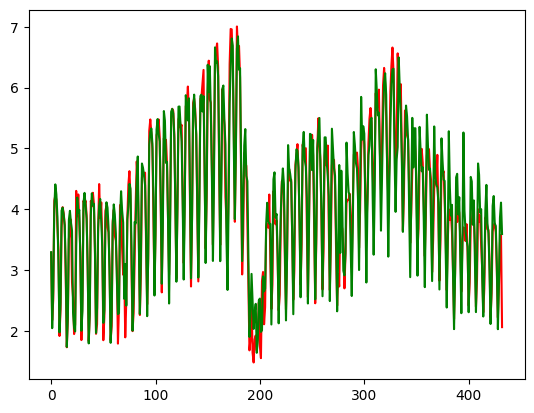

In [32]:
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(y_pred_rf, label='RF Prediction', color='green')
plt.show()

In [62]:
#boosting

from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.03, max_depth=6)
model_xgb.fit(X_train, y_train)

y_pred_xgb=model_xgb.predict(X_test)


In [63]:
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost\n')
print(f'MSE: {mse_xgb}')
print(f'MAE: {mae_xgb}')
print(f'R2 : {r2_xgb}')

XGBoost

MSE: 0.1623339431752027
MAE: 0.28852324438425464
R2 : 0.8844210320720105


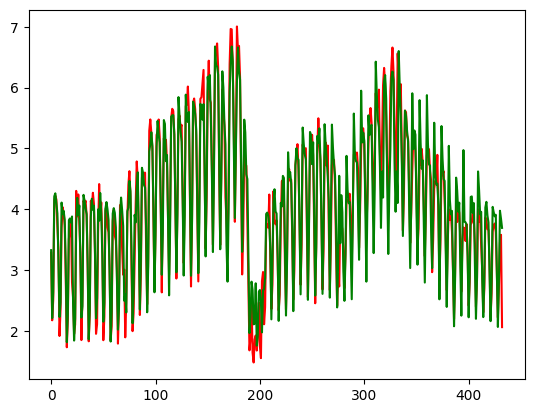

In [64]:
plt.plot(y_test.values,  color='red',label='Actual')
plt.plot(y_pred_xgb, label='XGB Prediction', color='green')
plt.show()

In [ ]:
# bonus

In [65]:
df = data.copy()
df.dropna(inplace=True)
df

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,page_loads_3,unique_visits_3,first_time_visits_3,returning_visits_3,page_loads_2,unique_visits_2,first_time_visits_2,returning_visits_2,page_loads_1,unique_visits_1,first_time_visits_1,returning_visits_1
date,,,,,,,,,,,,,,,,,
2014-09-17,6,3.667,2.614,2.327,287.0,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
2014-09-18,4,3.316,2.366,2.130,236.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
2014-09-19,0,2.815,1.863,1.622,241.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0
2014-09-20,2,1.658,1.118,985.000,133.0,3.667,2.614,2.327,287.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0
2014-09-21,3,2.288,1.656,1.481,175.0,3.316,2.366,2.130,236.0,2.815,1.863,1.622,241.0,1.658,1.118,985.000,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373,323.0,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2020-08-16,3,2.724,2.037,1.686,351.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2020-08-17,1,3.456,2.638,2.181,457.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0


In [66]:
X = df.drop(columns = features,axis=1)
y = df['page_loads']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, shuffle=False)

In [67]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
model = RandomForestRegressor(criterion='squared_error')
param_grid = {
    'max_depth': [5,8,12,18],
    'n_estimators': [80,100,200],
    'min_samples_split':[2,5]
}
tscv = TimeSeriesSplit(n_splits =5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 12, 18],
                         'min_samples_split': [2, 5],
                         'n_estimators': [80, 100, 200]},
             scoring='neg_mean_squared_error')

In [68]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Mean Squared Error: {mse}")
print(f'Mean Absolute Error: {mae}')
print(f'R2 : {r2}')

Best max_depth: 8
Mean Squared Error: 0.1788377469789093
Mean Absolute Error: 0.3157638796445468
R2 : 0.8209647944849787


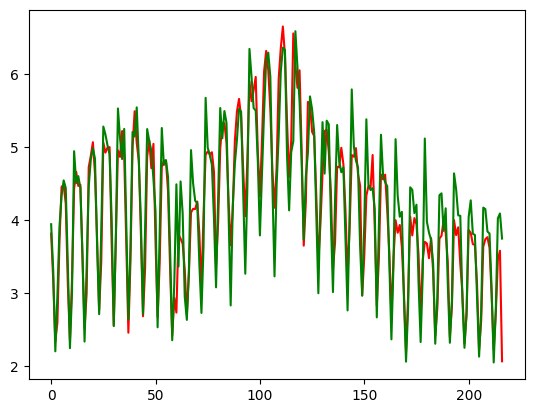

In [69]:
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(y_pred, label='RF Prediction', color='green')
plt.show()